In [133]:
import numpy as np 
import pandas as pd 

In [137]:
data = pd.read_csv('Dataset(CSV_Modified).csv')

In [141]:
data = data.dropna()
data.tail()

,Id,Name,Priority,Test Case Type,Testing Types,Components,Status
56,TC-46378,Verify Display/Update Shared Projects via data...,P2 (Medium - When time permits),Functional - UI,"Integration Testing, Regression Testing",Selective Test Case Sharing,1.0
57,TC-46381,Verify Requirement Field in Test Run Data Quer...,P1 (High - Must run in any case),Functional - UI,"Integration Testing, Regression Testing",Selective Test Case Sharing,1.0
58,TC-46382,Verify Batch Edit in Shared Projects via data ...,P2 (Medium - When time permits),Functional - UI,Integration Testing,Selective Test Case Sharing,1.0
59,TC-46383,Verify Export excel file allows users to selec...,P2 (Medium - When time permits),Functional - UI,Integration Testing,Selective Test Case Sharing,1.0
60,TC-46384,Verify Display Shared Projects via data query-...,P2 (Medium - When time permits),Functional - UI,Integration Testing,Selective Test Case Sharing,1.0


In [142]:
type(data["Name"])

pandas.core.series.Series

In [143]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
#nltk.download('corpus')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
def clean_text(df):
    descriptions = list()
    lines = df["Name"].values.tolist()
    for text in lines:
        text = text.lower()
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        custom_stopwords_list = ['verify', 'user', 'able', 'project', 'test', 'case', 'A', 'MR']
        stop_words = set(stopwords.words("english") + custom_stopwords_list)
        stop_words.discard("not")
        PS = PorterStemmer()
        words = [PS.stem(w) for w in words if not w in stop_words]
        words = ' '.join(words)
        descriptions.append(words)
    return descriptions

descriptions = clean_text(data)
type(descriptions)
#descriptions

list

In [145]:
stopWords = set(stopwords.words('english')) | set(['verify', 'user'])


In [146]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(min_df = 2)   
X = CV.fit_transform(descriptions).toarray()
df = pd.concat([data])
y = df["Status"].to_numpy()
print(np.shape(X))
print(np.shape(y))

(59, 70)
(59,)


In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(criterion="entropy", random_state=41)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

y_pred_NB = model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix
print(accuracy_score(y_test, y_pred_NB))
print(f1_score(y_test, y_pred_NB, average = 'micro'))
print(precision_score(y_test, y_pred_NB, average = 'micro'))
print(confusion_matrix(y_test, y_pred_NB))

0.5833333333333334
0.5833333333333334
0.5833333333333334
[[3 1]
 [4 4]]


In [166]:
#y_pred = model.predict(X_test)
y_pred_NB

array([-1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.])

In [167]:
y_test

array([ 1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.])

In [161]:
from sklearn import svm
SVM = svm.SVC(C = 1.0, kernel = 'linear', degree = 2, gamma = 'auto')
SVM.fit(X_train,y_train)

y_pred_SVM = SVM.predict(X_test)

print(accuracy_score(y_test, y_pred_SVM))
print(f1_score(y_test, y_pred_SVM, average = 'micro'))
print(precision_score(y_test, y_pred_SVM, average = 'micro'))
print(confusion_matrix(y_test, y_pred_SVM))

0.6666666666666666
0.6666666666666666
0.6666666666666666
[[1 3]
 [1 7]]


In [150]:
y_pred_SVM

array([ 1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [164]:
y_test

array([ 1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.])

In [156]:
valdata = pd.read_csv('ValidationDataset.csv')

In [157]:
valdata = valdata.dropna()
valdata.tail()

,Id,Name,Priority,Test Case Type,Testing Types,Components,Status
20,TC-46212,MR-17233 Add Test Run dialog - Test Design tab...,P1 (High - Must run in any case),Functional - UI,Acceptance Testing,Project Settings - Test Case Settings,1
26,TC-46262,MR-17470 API - Verify that system not allow to...,P1 (High - Must run in any case),Functional - API,Acceptance Testing,Project Settings - Test Case Settings,-1
27,TC-46263,MR-17470 API - Verify that system allow to cre...,P1 (High - Must run in any case),Functional - API,Acceptance Testing,Project Settings - Test Case Settings,1
28,TC-46264,MR-17470 API - Verify that system not allow to...,P2 (Medium - When time permits),Functional - API,Regression Testing,Project Settings - Test Case Settings,1
29,TC-46273,Verify the Popup when user attempts to delete ...,P2 (Medium - When time permits),Functional - UI,Integration Testing,Test Execution,1


In [158]:
X_validate = CV.transform(valdata['Name']).toarray()

In [180]:
y_pred_validate_SVM = SVM.predict(X_validate)

In [181]:
y_pred_validate_SVM

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [182]:
y_pred_validate_NB = model.predict(X_validate)

In [183]:
y_pred_validate_NB

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [186]:
y_actual = valdata['Status'].tolist()
y_actual

[1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1]

In [185]:
print(accuracy_score(y_actual,y_pred_validate_SVM))

0.5714285714285714


In [190]:
print(accuracy_score(y_actual,y_pred_validate_NB))

0.7142857142857143


In [189]:
print('Actual: ', y_actual)
print('NB model:', y_pred_validate_NB)
print('SVM model:', y_pred_validate_SVM)

Actual:  [1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1]
NB model: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.]
SVM model: [ 1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.]


In [207]:
data_df = []
data_df.append(y_actual)
data_df.append(y_pred_validate_NB)
data_df.append(y_pred_validate_SVM)
df = pd.DataFrame(data_df).transpose()
df.columns = ['y_actual', 'y_pred_validate_NB', 'y_pred_validate_SVM']
print(df)

    y_actual  y_pred_validate_NB  y_pred_validate_SVM
0        1.0                -1.0                  1.0
1        1.0                -1.0                  1.0
2        1.0                -1.0                  1.0
3       -1.0                -1.0                  1.0
4       -1.0                -1.0                  1.0
5       -1.0                -1.0                  1.0
6       -1.0                -1.0                  1.0
7       -1.0                -1.0                  1.0
8       -1.0                -1.0                 -1.0
9       -1.0                -1.0                  1.0
10      -1.0                -1.0                  1.0
11       1.0                 1.0                  1.0
12       1.0                 1.0                  1.0
13      -1.0                 1.0                  1.0
14       1.0                -1.0                  1.0
15       1.0                 1.0                  1.0
16       1.0                 1.0                  1.0
17      -1.0                

In [193]:
cf_matrix = confusion_matrix(y_actual, y_pred_validate_NB)

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

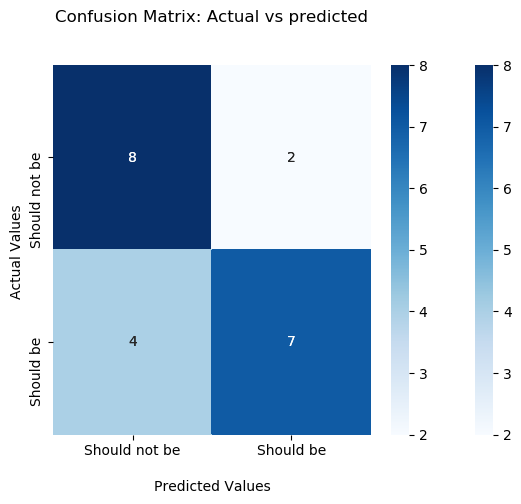

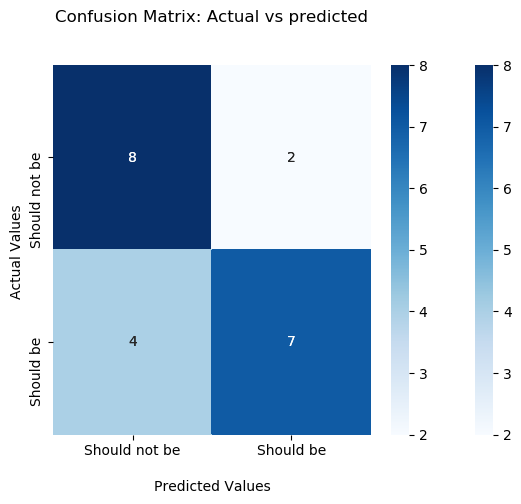

In [201]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix: Actual vs predicted\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Should not be','Should be'])
ax.yaxis.set_ticklabels(['Should not be','Should be'])

plt.show()